In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
def visualization(x, y, xlabel):
    plt.figure(figsize=(10,5))
    plt.hist([x, y], color=['red', 'green'], label = ['exit', 'not_exit'])
    plt.xlabel(xlabel,fontsize=20)
    plt.ylabel("No. of customers", fontsize=20)
    plt.legend()

In [8]:
df_churn_exited = df[df['Exited']==1]['Tenure']
df_churn_not_exited = df[df['Exited']==0]['Tenure']

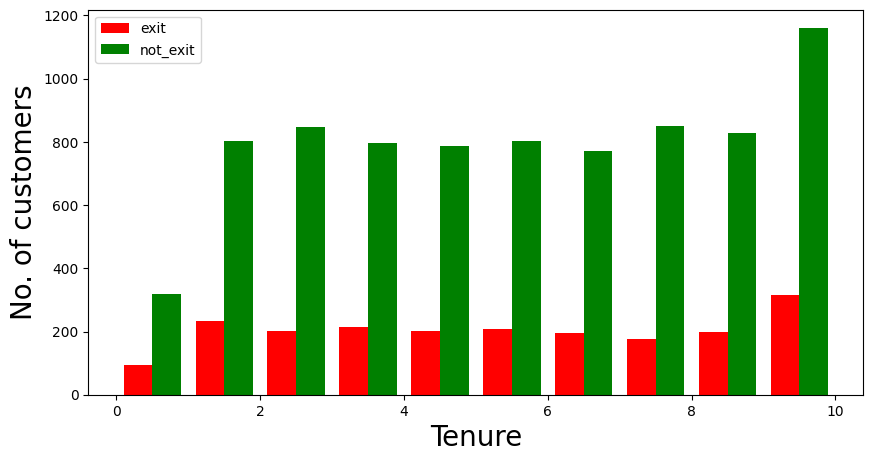

In [9]:
visualization(df_churn_exited, df_churn_not_exited, "Tenure")

In [10]:
df_churn_exited2 = df[df['Exited']==1]['Age']
df_churn_not_exited2 = df[df['Exited']==0]['Age']

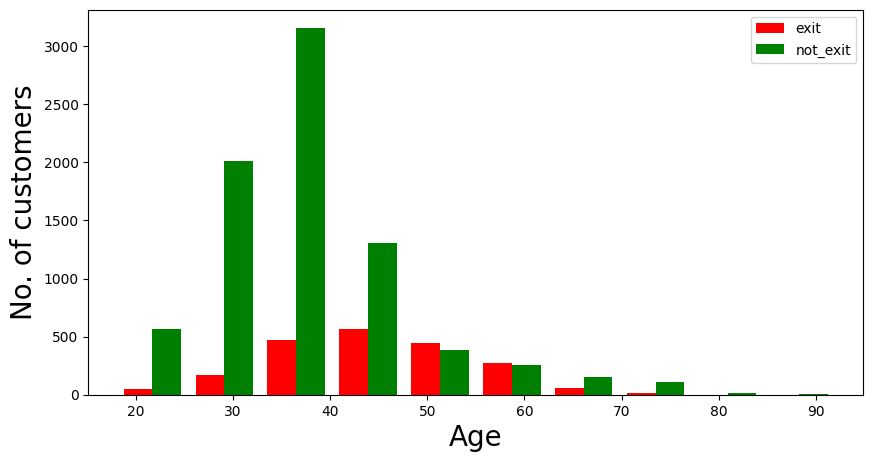

In [11]:
visualization(df_churn_exited2,df_churn_not_exited2, 'Age')

In [12]:
X = df[['CreditScore','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
states = pd.get_dummies(df['Geography'],drop_first = True)
gender = pd.get_dummies(df['Gender'],drop_first = True)

In [13]:
gender

Male
0     False
1     False
2     False
3     False
4     False
...     ...
9995   True
9996   True
9997  False
9998   True
9999  False

[10000 rows x 1 columns]

In [14]:
df = pd.concat([df,gender,states], axis = 1)
df

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited   Male  Germany  Spain  
0           101348.88       1  False    False  False  
1           112542.58       0  False    False   True  
2           113931.57       1  False    False  False  
3            93826.63       0  False    False  False  
4            79084.10       0  False    False   True  
...               ...     ...    ...      ...    ...  
9995         96270.64       0   True    False  False  
9996        101699.77       0   True    False  False  
9997         42085.58       1  False    False  False  
9998         92888.52       1   True     True  False  
9999         38190.78       0  False    False  False  

[10000 rows x 17 columns]

In [15]:
X = df[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Male','Germany','Spain']]
y=df[['Exited']]

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30)

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [18]:
X_train  = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
import keras

In [20]:
from keras.models import Sequential #To create sequential neural network
from keras.layers import Dense #To create hidden layers

In [21]:
classifier = Sequential()

In [22]:
classifier.add(Dense(activation = "relu",input_dim = 11,units = 6,kernel_initializer = "uniform"))

In [23]:
classifier.add(Dense(activation = "relu",units = 6,kernel_initializer = "uniform"))   #Adding second hidden layers

In [24]:
classifier.add(Dense(activation = "sigmoid",units = 1,kernel_initializer = "uniform")) 

In [25]:
classifier.compile(optimizer="adam",loss = 'binary_crossentropy',metrics = ['accuracy']) 

In [26]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [27]:
classifier.fit(X_train,y_train,batch_size=10,epochs=50)

Epoch 1/50
700/700 [==============================] - 2s 1ms/step - loss: 0.4958 - accuracy: 0.7957
Epoch 2/50
700/700 [==============================] - 1s 1ms/step - loss: 0.4266 - accuracy: 0.7959
Epoch 3/50
700/700 [==============================] - 1s 1ms/step - loss: 0.4222 - accuracy: 0.7959
Epoch 4/50
700/700 [==============================] - 1s 1ms/step - loss: 0.4183 - accuracy: 0.7994
Epoch 5/50
700/700 [==============================] - 1s 1ms/step - loss: 0.4148 - accuracy: 0.8210
Epoch 6/50
700/700 [==============================] - 1s 1ms/step - loss: 0.4125 - accuracy: 0.8279
Epoch 7/50
700/700 [==============================] - 1s 1ms/step - loss: 0.4107 - accuracy: 0.8284
Epoch 8/50
700/700 [==============================] - 1s 1ms/step - loss: 0.4091 - accuracy: 0.8309
Epoch 9/50
700/700 [==============================] - 1s 1ms/step - loss: 0.4081 - accuracy: 0.8304
Epoch 10/50
700/700 [==============================] - 1s 1ms/step - loss: 0.4073 - accuracy: 0.8319

In [28]:
y_pred =classifier.predict(X_test)
print(y_pred)
print(y_pred.shape)
y_pred = (y_pred > 0.5)
print(y_pred)

94/94 [==============================] - 0s 1ms/step
[[0.03699028]
 [0.8231219 ]
 [0.21996942]
 ...
 [0.17796844]
 [0.68516517]
 [0.24285719]]
(3000, 1)
[[False]
 [ True]
 [False]
 ...
 [False]
 [ True]
 [False]]


In [29]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [30]:
cm = confusion_matrix(y_test,y_pred)

In [31]:
cm

array([[2302,   90],
       [ 409,  199]], dtype=int64)

In [32]:
accuracy = accuracy_score(y_test,y_pred)

In [33]:
accuracy

0.8336666666666667

Text(95.72222222222221, 0.5, 'Truth')

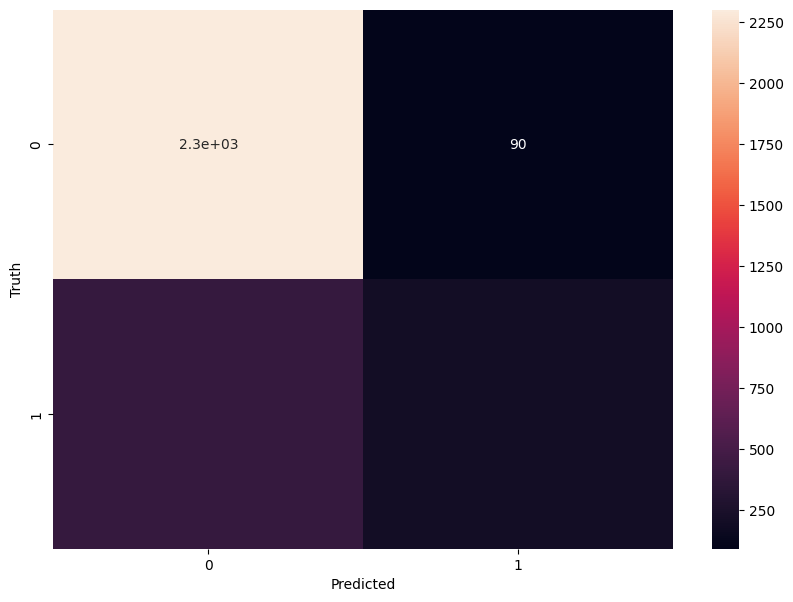

In [34]:
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      2392
           1       0.69      0.33      0.44       608

    accuracy                           0.83      3000
   macro avg       0.77      0.64      0.67      3000
weighted avg       0.82      0.83      0.81      3000



In [36]:
new_customer = [[0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]]

In [37]:
new_customer = sc.transform(sc.transform(new_customer))

C:\Users\meenu\anaconda32\envs\tf\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\meenu\anaconda32\envs\tf\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [38]:
new_prediction = classifier.predict(new_customer)
new_prediction

1/1 [==============================] - 0s 23ms/step


array([[0.]], dtype=float32)

In [39]:
new_prediction = (new_prediction > 0.5)
new_prediction

array([[False]])